In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)

%matplotlib inline

In [2]:
from analysis.utils import read_ticker

prices_by_day, time = read_ticker("VTBR")
days = list(prices_by_day.keys())

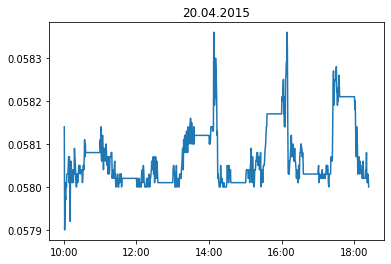

In [3]:
import random
from analysis.utils import plot_day_prices

day_ind = random.choice(range(len(days)))
day = days[day_ind]
plot_day_prices(prices_by_day[day], time, day)

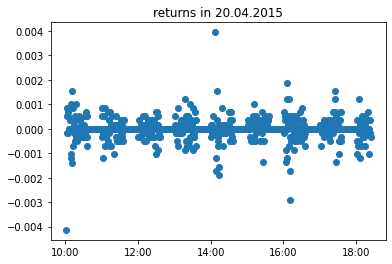

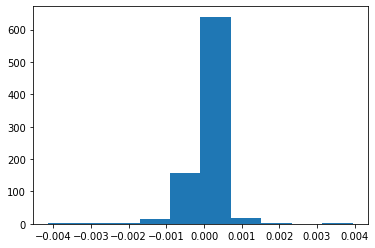

In [4]:
from analysis.utils import log_returns, format_day, plot_with_time

returns = log_returns(prices_by_day)
assert len(time) == len(returns[0]) + 1
fig, ax = plot_with_time()
ax.set_title(f"returns in {format_day(day)}")
ax.plot(time[1:], returns[day_ind], "o")  # 0 day returns
plt.show()
plt.hist(returns[day_ind])
plt.show()

In [5]:
from analysis.utils import returns_window, add_time

n_pred = 5
dataset_by_day = returns_window(returns, n_pred)
add_time(dataset_by_day, time[n_pred + 1:])
assert len(dataset_by_day) == len(returns)

In [6]:
from analysis.utils import train_test_split

train_by_day, test_by_day = train_test_split(dataset_by_day, ratio=0.7)

In [7]:
from analysis.utils import get_X_y

X_train, y_train = get_X_y(train_by_day)
X_test, y_test = get_X_y(test_by_day)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((145116, 6), (145116, 1), (61716, 6), (61716, 1))

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test), pipe.score(X_train, y_train))
print(f"coef = {pipe[1].coef_}")

y_pred = pipe.predict(X_test)
print(f"RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")

0.022940162772393524 0.014449785950433336
coef = [[ 3.81768939e-06 -4.06783646e-06 -7.61092665e-06 -2.11212613e-05
  -8.21987742e-05  3.39441296e-06]]
RMSE = 0.0007839103177797475


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
print(f"R^2 = {model.score(X_test, y_test)}")
print(f"coef = {model.coef_}")

y_pred = model.predict(X_test)
print(f"RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"{y_test.mean() = }")
print(f"{y_test.std() = }")

R^2 = 0.02294016277250388
coef = [[ 5.50039951e-03 -5.88491515e-03 -1.10487099e-02 -3.07966758e-02
  -1.19949739e-01  3.90101656e-10]]
RMSE = 0.0007839103177797032
y_test.mean() = -9.140411914309672e-07
y_test.std() = 0.0007930595510256248
